# PART 2

## Sales Data Set

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_excel('Adidas US Sales Datasets 1.xlsx')

In [4]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [5]:
df.shape

(9648, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [7]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [8]:
# Extract Year, Month, and Date
df['Invoice_Year'] = df['Invoice Date'].dt.year
df['Invoice_Month'] = df['Invoice Date'].dt.month
df['Invoice_Date'] = df['Invoice Date'].dt.day

In [11]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Invoice_Year,Invoice_Month,Invoice_Date
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,2020,1,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,2020,1,2
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020,1,3
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020,1,4
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,2020,1,5


In [16]:
# df.to_excel('Sales_data.xlsx', index=False)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Invoice_Year      9648 non-null   int64         
 14  Invoice_Month     9648 n

In [46]:
df['Region'].unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

# Products Data Sets

In [17]:
df1 = pd.read_csv('amazon_products_dataset.csv')

In [18]:
df1.head()

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021,NaN,75a42851-6462-54b5-988a-27d336221943,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25


In [20]:
df1.shape

(6823, 11)

In [21]:
df1.isnull().sum()

url                     0
product_name            0
reviewer_name           0
review_title            1
review_text             9
review_rating           0
verified_purchase       0
review_date             0
helpful_count        4870
uniq_id                 0
scraped_at              0
dtype: int64

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823 entries, 0 to 6822
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                6823 non-null   object 
 1   product_name       6823 non-null   object 
 2   reviewer_name      6823 non-null   object 
 3   review_title       6822 non-null   object 
 4   review_text        6814 non-null   object 
 5   review_rating      6823 non-null   float64
 6   verified_purchase  6823 non-null   bool   
 7   review_date        6823 non-null   object 
 8   helpful_count      1953 non-null   object 
 9   uniq_id            6823 non-null   object 
 10  scraped_at         6823 non-null   object 
dtypes: bool(1), float64(1), object(9)
memory usage: 539.8+ KB


In [25]:
columns_ = ['url', 'helpful_count', 'uniq_id', 'scraped_at']

In [26]:
df2 = df1.drop(columns=columns_)

In [27]:
df2.head()

,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date
0,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020
1,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021
2,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021
3,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021
4,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021


In [29]:
df2.isnull().sum()

product_name         0
reviewer_name        0
review_title         1
review_text          9
review_rating        0
verified_purchase    0
review_date          0
dtype: int64

In [30]:
df2 = df2.dropna().reset_index(drop=True)

In [31]:
df2.isnull().sum()

product_name         0
reviewer_name        0
review_title         0
review_text          0
review_rating        0
verified_purchase    0
review_date          0
dtype: int64

In [32]:
df2.shape

(6813, 7)

In [33]:
df2['year'] = df2['review_date'].str.extract(r'(\d{4})')

In [34]:
df2.head()

,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,year
0,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2020
1,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,2021
2,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,2021
3,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021,2021
4,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2021


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6813 entries, 0 to 6812
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       6813 non-null   object 
 1   reviewer_name      6813 non-null   object 
 2   review_title       6813 non-null   object 
 3   review_text        6813 non-null   object 
 4   review_rating      6813 non-null   float64
 5   verified_purchase  6813 non-null   bool   
 6   review_date        6813 non-null   object 
 7   year               6813 non-null   object 
dtypes: bool(1), float64(1), object(6)
memory usage: 379.4+ KB


In [37]:
df2['year'] = df2['year'].astype(int)

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6813 entries, 0 to 6812
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       6813 non-null   object 
 1   reviewer_name      6813 non-null   object 
 2   review_title       6813 non-null   object 
 3   review_text        6813 non-null   object 
 4   review_rating      6813 non-null   float64
 5   verified_purchase  6813 non-null   bool   
 6   review_date        6813 non-null   object 
 7   year               6813 non-null   int64  
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 379.4+ KB


In [40]:
# df2.to_excel('Product_data.xlsx', index=False)

# PART 3

## Statistical Analysis

In [41]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'Invoice_Year',
       'Invoice_Month', 'Invoice_Date'],
      dtype='object')

#### Correlation Analysis:

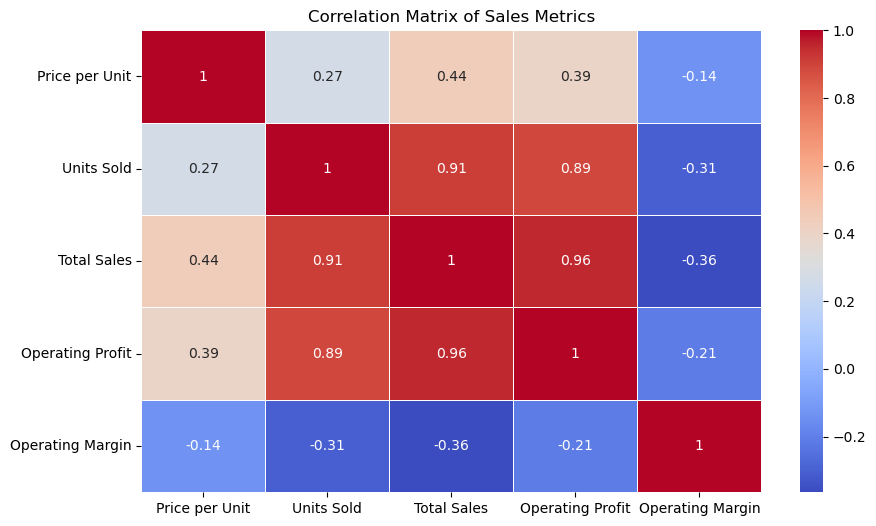

In [43]:
# Select columns of interest
correlation_columns = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']

# Perform correlation analysis
corr_matrix = df[correlation_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Sales Metrics')
plt.show()

#### Trend Analysis:

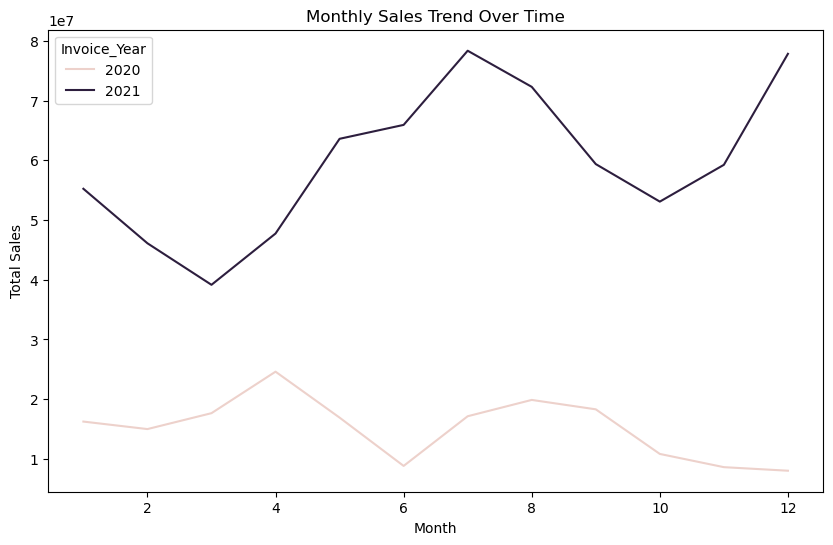

In [44]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Group sales by month and year to observe trends
monthly_sales = df.groupby(['Invoice_Year', 'Invoice_Month'])['Total Sales'].sum().reset_index()

# Plot sales trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Invoice_Month', y='Total Sales', hue='Invoice_Year')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

#### Hypothesis Testing:

In [48]:
# Perform t-test to compare sales in two regions
region_Northeast = df[df['Region'] == 'Northeast']['Total Sales']
region_South = df[df['Region'] == 'South']['Total Sales']
region_West = df[df['Region'] == 'West']['Total Sales']
region_Midwest = df[df['Region'] == 'Midwest']['Total Sales']
region_Southeast = df[df['Region'] == 'Southeast']['Total Sales']
# Perform one-way ANOVA for multiple groups
f_stat, p_value = stats.f_oneway(region_Northeast, region_South, region_West, region_Midwest, region_Southeast)

print(f'F-statistic: {f_stat}, P-value: {p_value}')

F-statistic: 52.69149760889306, P-value: 5.537482184638756e-44


## Predictive Analytics

#### Preprocessing:

In [49]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Quarter'] = df['Invoice Date'].dt.quarter

# Aggregate data to get total sales per quarter
quarterly_sales = df.groupby(['Invoice_Year', 'Quarter'])['Total Sales'].sum().reset_index()

#### Train-Test Split:

In [50]:
from sklearn.model_selection import train_test_split

# Select features and target
X = quarterly_sales[['Invoice_Year', 'Quarter']]
y = quarterly_sales['Total Sales']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#### Model Building:

In [53]:
from statsmodels.tsa.arima.model import ARIMA

# Build ARIMA model
model = ARIMA(y_train, order=(5, 1, 0))  # (p, d, q) parameters for ARIMA
model_fit = model.fit()

# Forecast the next quarter
forecast = model_fit.forecast(steps=1)

# Access the first forecasted value using .iloc[0]
print(f'Predicted Sales for the next quarter: {forecast.iloc[0]}')

Predicted Sales for the next quarter: 189113096.82632062


/Users/arul/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


#### Model Evaluation:

In [55]:
from sklearn.metrics import mean_absolute_error

# Predict on test data
y_pred = model_fit.forecast(steps=len(y_test))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

MAE: 27083876.75647901
